# **Residual Standard Error**

The reseidual standard error (RSE) is a measure of lack of fit of the model to the data.
- If RSE is closer to 0 we have a great model and if RSE keeps increasing we probably have a model that doesn't fhe fit the data well.

----
In an SLRM  *Y = B0 +B1X1 + E*, the random error term prevents a perfect perdiction even if the population coefficients are excatly known.

The RSE is an in-sample estimate of the standard deviation sigma of the random error term *E*.

It is the avarage of residual sum of squares.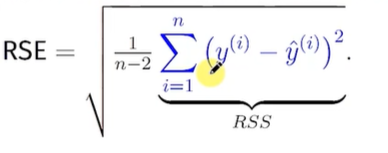

The RSE is the amount by which the response will deviate from the true regression line on an average.
- bigger the RSE, we can expect a larger deviation from true regression line
- smaller the RSE, we can expect a smaller deviation from the true regression line

(This is visible as we can see that the true value 'y' and predicted value 'yhat' are closer to one another for a large number of samples.)

In [ ]:
install.packages(c('ggplo2', 'dplyr'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplo2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
# Loading the mtcars dataset
file = '/content/mtcars1.csv'
carData = read.csv(file, header = TRUE, row.names = 1, stringsAsFactors = FALSE)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: int  4 4 1 1 2 1 4 2 2 4 ...


In [ ]:
# Converting categorical columns to represent factor levels
categorical_cols = c('cyl', 'vs', 'am', 'gear', 'carb')
carData[categorical_cols] = lapply(carData[categorical_cols], as.factor)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 1 2 2 2 ...
 $ am  : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: Factor w/ 3 levels "3","4","5": 2 2 2 1 1 1 1 2 2 2 ...
 $ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...


In [ ]:
#Print the first five rows (or samples) in the data frame
head(carData, 5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


In [8]:
# Fitting a simple linear regression model for mpg as a function of hp
model = lm(data = carData, mpg ~ hp)

# Printing summary of model
summary(model)


Call:
lm(formula = mpg ~ hp, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


As we know that the model says that, on an average, if we were to predict mpg based on hp then:
- the predicted mpg = B0hat (30.09886) + B1hat (-0.06823) * hp

### Now, `Residual standard error: 3.863` tells us that what we predicted could actually be 3.863 units away from the true value.

It tells us how far can we be from true regression line.

# **R-Squared Statistic**

### **Average Model**
The `average model` simply predicts that for any new sample, the mpg is simply the average of the mpg that we have in our dataset.

This model has an error associated with it which is called "**Total Sum of Squares (TSS)**". It is simply the true value minus the average value predicted by the simple average model, squared and added for all the samples.
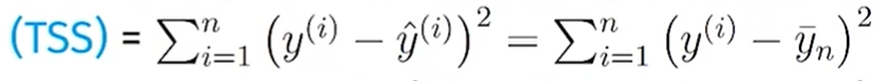

So, the **TSS**, in some sense, is the measure of the worst possible error.

### **SLRM**

The error associated with this model is residual sum of squares (RSS)

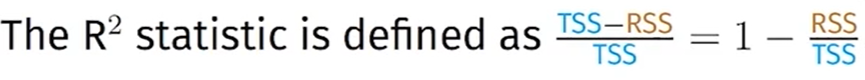

- TSS is the of the total variability in the response variable.
- RSS is the variability in the response variable that is not explained by the simple linear regression model.

Therefore, the difference between these would be the variability that is actually explained by the SLRM.

----
So we have numerator as the variability that is actually explained by the SLRM and denominator as the total variability.

If the model is fantastic and explains all the variability in the data, then we will have RSS equal to 0.

----

In this case the R2 value will be equal to 1 meaniung that 100% of the variability in the data is explained by the SLRM.


## O meaning there is no variability in the data
## 1 meaning there is a significant variability in the data

R2 = 0.4 (Only 40% of the variability of the data is explained by the model.)

In [9]:
# Fitting a simple linear regression model for mpg as a function of hp
model = lm(data = carData, mpg ~ hp)

# Printing summary of model
summary(model)


Call:
lm(formula = mpg ~ hp, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


As we can see here, R-squared:0.6024 meaning hp is able to explain 60.24% of variance in mpg.

It suggests that hp is perhaps a very important variable to predict what mpg for a car would be.

In [10]:
# Fitting a simple linear regression model for mpg as a function of wt
model = lm(data = carData, mpg ~ wt)

# Printing summary of model
summary(model)


Call:
lm(formula = mpg ~ wt, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


Here, 75% of the variability in the mpg is explained by the linear model built between mpg and wt.